In [1]:
# DSC 630
# Assignment Week 3
# Author :  Akila Selvaraj
# Created Date : 09/06/2022

# Change log
# Author: Akila Selvaraj
# Description : Initial version

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# generate related variables
from numpy import mean
from numpy import std

In [3]:
# Los Angeles Dodgers Major League Baseball (MLB) team
dodger_df=pd.read_csv('dodgers-2022.csv')
dodger_df.info

<bound method DataFrame.info of    month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0    APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1    APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2    APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3    APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4    APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
..   ...  ...     ...         ...      ...   ...     ...       ...  ..   ...   
76   SEP   29   40724    Saturday  Rockies    84  Cloudy     Night  NO    NO   
77   SEP   30   35607      Sunday  Rockies    95  Clear        Day  NO    NO   
78   OCT    1   33624      Monday   Giants    86  Clear      Night  NO    NO   
79   OCT    2   42473     Tuesday   Giants    83  Clear      Night  NO    NO   
80   OCT    3   34014   Wednesday   Giants    82  Cloudy     Night  NO    NO   

   fire

In [4]:
# Use this data to make a recommendation to management on how to improve attendance. 
# Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. 
# This is an open-ended question, and there is no one right answer. 
# You are welcome to do additional research and/or use domain knowledge to assist your analysis, 
# but clearly state any assumptions you make.

Text(0.5, 1.0, 'Histogram of attendance')

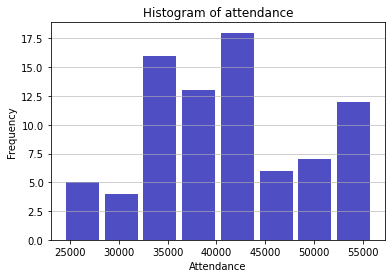

In [5]:
# Histogram of attendance
n, bins, patches = plt.hist(x=dodger_df.attend, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.title('Histogram of attendance')

In [6]:
print("Max_attend :",max(dodger_df.attend))
print("Mean_attend :",mean(dodger_df.attend))

Max_attend : 56000
Mean_attend : 41040.07407407407


Mean of the attendance is around 40000. Maximum attendance we are trying to achieve is 56000. 

Text(0.5, 1.0, 'Histogram of temp')

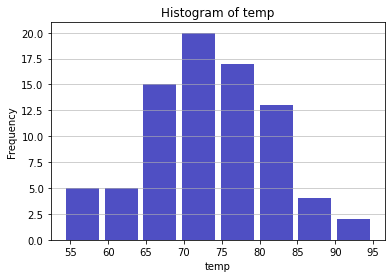

In [7]:
# Histogram of temperature
n, bins, patches = plt.hist(x=dodger_df.temp, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('temp')
plt.ylabel('Frequency')
plt.title('Histogram of temp')

Histogram of temperature shows that distribution is high around temperature 70 to 75.

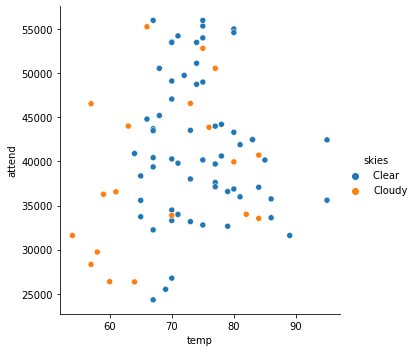

In [8]:
# Checking if clear sky has any impact on attendance
sns.relplot(x='temp', y='attend', hue='skies',  data=dodger_df) 

From the above plot, it shows that attendance is little more on clear sky days than on cloudy days.

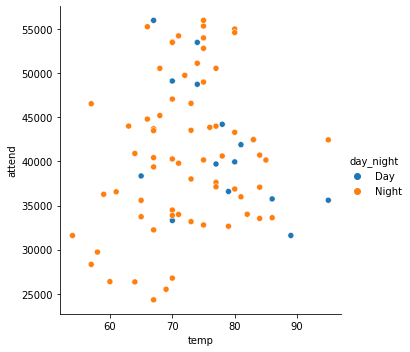

In [9]:
#Scatter plot to check how day_night impacts the attendance
sns.relplot(x='temp', y='attend', hue='day_night',  data=dodger_df) 

From the plot, it appears that people prefers to watch the match on night than on day time.

In [10]:
# summarize
print('Mean and Standard Variation of attendance:\nmean=%.3f \nstdv=%.3f' % (mean(dodger_df.attend), std(dodger_df.attend)))

Mean and Standard Variation of attendance:
mean=41040.074 
stdv=8246.161


In [11]:
# Correlation matrix
cormat = dodger_df.corr()
round(cormat,2)

,day,attend,temp
day,1.00,0.03,-0.13
attend,0.03,1.00,0.10
temp,-0.13,0.10,1.00


In [12]:
#To check if people prefers weekend to watch the games, Creating a new boolean variable for weekends

In [13]:
dodger_df['skies_cat']=dodger_df['skies'].astype('category').cat.codes
dodger_df['day_night_cat']=dodger_df['day_night'].astype('category').cat.codes
dodger_df['weekend_days'] = dodger_df['day_of_week'].apply(lambda x: 1 if (x == 'Friday' or x == 'Saturday' or x == 'Sunday') else 0)

print(dodger_df.head())
# df['media']=df['media'].astype('category').cat.codes
dodger_df.corr()

  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  skies_cat  day_night_cat  weekend_days  
0        NO         NO          0              0             0  
1        NO         NO          1              1             0  
2        NO         NO          1              1             0  
3       YES         NO          1              1             1  
4        NO         NO          1              1             1  


,day,attend,temp,skies_cat,day_night_cat,weekend_days
day,1.000000,0.027093,-0.127612,-0.038396,-0.039828,0.183002
attend,0.027093,1.000000,0.098951,-0.150963,-0.043544,0.091089
temp,-0.127612,0.098951,1.000000,-0.316584,-0.272141,0.042513
skies_cat,-0.038396,-0.150963,-0.316584,1.000000,0.188903,-0.125262
day_night_cat,-0.039828,-0.043544,-0.272141,0.188903,1.000000,-0.303904
weekend_days,0.183002,0.091089,0.042513,-0.125262,-0.303904,1.000000


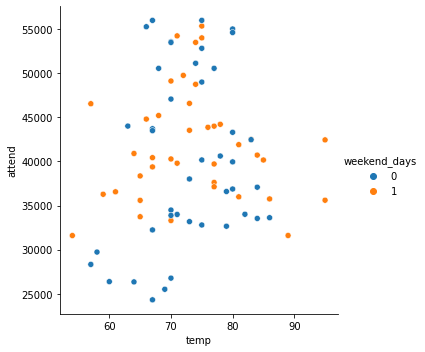

In [14]:
# Scatter plot to check if weekend population is more
sns.relplot(x='temp', y='attend', hue='weekend_days',  data=dodger_df) 

From the above plot, the population difference between weekend and weekdays doesn't show much difference.

From the plots plotted, It seems that people prefers evening games when the sky is clear